In [1]:
# iris_softmax_multi_classification

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

species_list =['"setosa"','"versicolor"','"virginica"']

xy = np.loadtxt('iris.csv',delimiter=',',dtype=np.str,skiprows=1)
xy.shape

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14580\385832820.py:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xy = np.loadtxt('iris.csv',delimiter=',',dtype=np.str,skiprows=1)


(150, 6)

In [2]:
x_train = np.float32(xy[:35,1:-1])
x_train = np.append(x_train , np.float32(xy[50:85,1:-1]),0)
x_train = np.append(x_train , np.float32(xy[100:135,1:-1]),0) # [105,4]

y_train = xy[:35,[-1] ]
y_train = np.append(y_train, xy[50:85,[-1]],0)
y_train = np.append(y_train, xy[100:135,[-1]],0) # [105,1]

for i in range(105):
   y_train[i,-1] = np.int32(species_list.index(y_train[i,-1]))
print(y_train)

[['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']]


In [3]:
x_test = np.float32(xy[35:50,1:-1])
x_test = np.append(x_test , np.float32(xy[85:100,1:-1]),0)
x_test = np.append(x_test , np.float32(xy[135:,1:-1]),0) # [45,4]

y_test = xy[35:50,[-1] ]
y_test = np.append(y_test, xy[85:100,[-1]],0)
y_test = np.append(y_test, xy[135:,[-1]],0) # [45,1]

for i in range(45):
   y_test[i,-1] = np.int32(species_list.index(y_test[i,-1]))
print(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# X = np.array(x_train,dtype=np.float32)
Y = np.array(y_train,dtype=np.int32)   # 반드시 int형으로(one_hot encoding)

[['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['1']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']
 ['2']]
(105, 4) (105, 1)
(45, 4) (45, 1)


In [4]:
# [one-hot 인코딩]
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [5]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}): 
        print('>>>myCallback:on_epoch_end',epoch)
        if(logs.get('accuracy') > 0.9):
            print('\nReached 85% accuracy so cancelling training!')
            self.model.stop_training = True
            
callbacks = myCallback() # 클래스의 인스턴스 생성
        

# Dense Layer 구현 : 2층
model = tf.keras.Sequential([
    # 첫번째 층 출력 : [None,20],   활성화 함수 : 'relu', metrics:['accuracy']
    tf.keras.layers.Dense(units=20,activation='relu',input_shape=(4,)) ,
    # 두번째 층 출력 : [Non,2],   활성화 함수 : 'relu'
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 학습
history = model.fit(x_train,y_train,epochs=700,batch_size=1,verbose=1,callbacks=[callbacks]) # verbose=1, 메세지를 출력

Epoch 1/700
105/105 [==============================] - 1s 881us/step - loss: 0.8597 - accuracy: 0.6000
Epoch 2/700
105/105 [==============================] - 0s 846us/step - loss: 0.4644 - accuracy: 0.7905
Epoch 3/700
105/105 [==============================] - 0s 837us/step - loss: 0.4310 - accuracy: 0.8000
Epoch 4/700
105/105 [==============================] - 0s 837us/step - loss: 0.2854 - accuracy: 0.8952
Epoch 5/700
105/105 [==============================] - 0s 816us/step - loss: 0.2899 - accuracy: 0.8571
Epoch 6/700
 62/105 [================>.............] - ETA: 0s - loss: 0.2240 - accuracy: 0.9032>>>myCallback:on_epoch_end 5

Reached 85% accuracy so cancelling training!
105/105 [==============================] - 0s 844us/step - loss: 0.2038 - accuracy: 0.9429


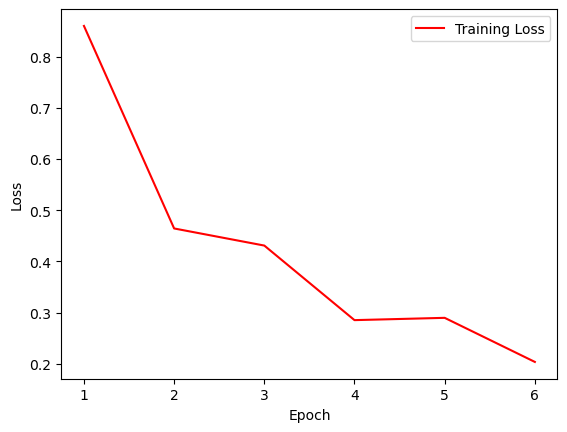

In [7]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
# 예측
preds = model.predict(x_train)
np.round(preds)

4/4 [==============================] - 0s 836us/step


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [9]:
# 평가
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9778


[0.15581519901752472, 0.9777777791023254]

In [10]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}): 
        print('>>>myCallback:on_epoch_end',epoch)
        if(logs.get('accuracy') > 0.9):
            print('\nReached 85% accuracy so cancelling training!')
            self.model.stop_training = True
            
callbacks = myCallback() # 클래스의 인스턴스 생성
        

# Dense Layer 구현 : 3층
model = tf.keras.Sequential([
    # 첫번째 층 출력 : [None,20],   활성화 함수 : 'relu', metrics:['accuracy']
    tf.keras.layers.Dense(units=40,activation='relu',input_shape=(4,)) ,
    # 첫번째 층 출력 : [None,20],   활성화 함수 : 'relu', metrics:['accuracy']
    tf.keras.layers.Dense(units=20,activation='relu',input_shape=(4,)) ,
    # 두번째 층 출력 : [Non,2],   활성화 함수 : 'relu'
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 40)                200       
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습
history = model.fit(x_train,y_train,epochs=700,batch_size=1,verbose=1,callbacks=[callbacks]) # verbose=1, 메세지를 출력

Epoch 1/700
105/105 [==============================] - 0s 916us/step - loss: 0.7791 - accuracy: 0.6286
Epoch 2/700
105/105 [==============================] - 0s 896us/step - loss: 0.4137 - accuracy: 0.7905
Epoch 3/700
105/105 [==============================] - 0s 934us/step - loss: 0.3803 - accuracy: 0.7714
Epoch 4/700
105/105 [==============================] - 0s 958us/step - loss: 0.2133 - accuracy: 0.8952
Epoch 5/700
105/105 [==============================] - 0s 931us/step - loss: 0.2917 - accuracy: 0.8762
Epoch 6/700
 54/105 [==============>...............] - ETA: 0s - loss: 0.3200 - accuracy: 0.8333>>>myCallback:on_epoch_end 5

Reached 85% accuracy so cancelling training!
105/105 [==============================] - 0s 901us/step - loss: 0.2244 - accuracy: 0.9048


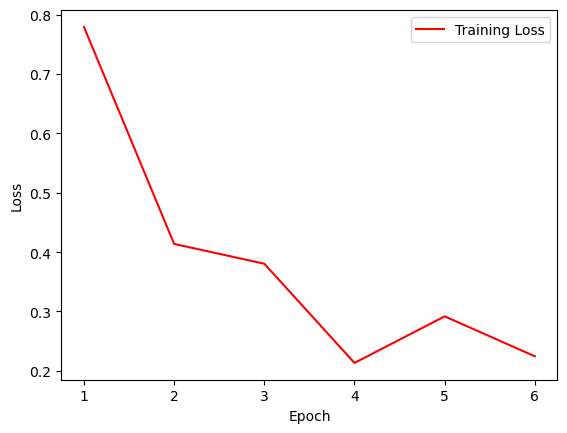

In [12]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [13]:
# 예측
preds = model.predict(x_train)
np.round(preds)

4/4 [==============================] - 0s 997us/step


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [14]:
# 평가
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 997us/step - loss: 0.1290 - accuracy: 0.9778


[0.12899741530418396, 0.9777777791023254]